## Pytorch Example

To run this, you'll need to [install Pytorch](https://pytorch.org/get-started/locally/).

Imports, and define some variables. We're going to work with 100 datapoints, with dimensionality 3, and build hidden layers with 5 nodes each.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

N=100
D=3
H=5

Load the data.  In this case, I'm just making random data, where $X$ is a random $N\times D$ matrix, and $y$ is almost, but not quite, a linear combination of those features.

In [2]:
X=np.random.rand(N,D)
y=X@np.random.randn(D,1)+2+.1*np.random.randn(100,1)
print(f'X shape: {X.shape}, y shape: {y.shape}')
X=torch.Tensor(X)
y=torch.Tensor(y)

X shape: (100, 3), y shape: (100, 1)


Build the network. We use inheritance to do this in pytorch. In this case, I've create a class called `SimpleNet`, which inherits from a class called `Module`.  Its initializer first calls its superclass's initializer, then builds three linear layers. The first transitions from $D$ to $H$, the second from $H$ to $H$, and the third from $H$ to 1.

The `forward` function defines how to calculate the output of the network: a ReLU is applied to the two hidden layers, and then no activation function at all is applied to the final output layer.

In [3]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet,self).__init__()
        self.fc1=nn.Linear(D,H)
        self.fc2=nn.Linear(H,H)
        self.fc3=nn.Linear(H,1)
    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=SimpleNet()

Use Mean Squared Error as our loss function.  Set up the optimizer to use SGD to improve the parameters of the network, with learning rate .01.

In [4]:
criterion=nn.MSELoss()
optimizer=optim.SGD(net.parameters(),lr=.01)

Optimize.  1000 times, calculate the outputs and the loss.  Zero out the optimizer to cancel out all bookkeeping from any previous passes. Calculate the gradient of the loss function with a backward pass.  Step the optimizer.

Every 100 epochs, print out the training loss.

In [5]:
for epoch in range(1000):
    # Forward pass
    outputs = net(X)
    loss = criterion(outputs, y)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3280
Epoch [200/1000], Loss: 0.3116
Epoch [300/1000], Loss: 0.2944
Epoch [400/1000], Loss: 0.2729
Epoch [500/1000], Loss: 0.2422
Epoch [600/1000], Loss: 0.1973
Epoch [700/1000], Loss: 0.1380
Epoch [800/1000], Loss: 0.0851
Epoch [900/1000], Loss: 0.0537
Epoch [1000/1000], Loss: 0.0363


Calculate what the neural net is predicting for each value

In [6]:
predicted=net(X)

Plot the actual $y$ values vs the predicted $y$ values.

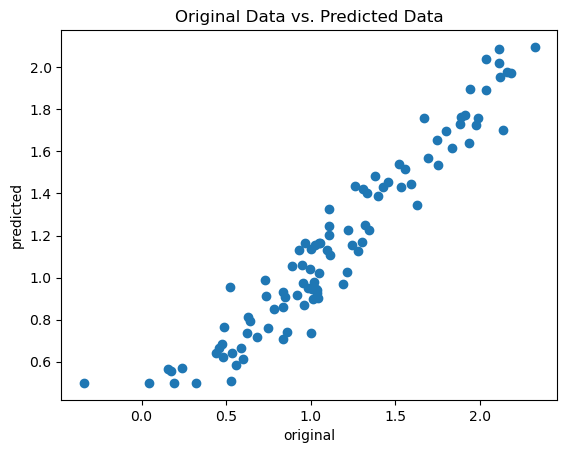

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y, predicted.detach().numpy())
plt.xlabel('original')
plt.ylabel('predicted')
plt.title('Original Data vs. Predicted Data')
plt.show()